In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Forecast as fc

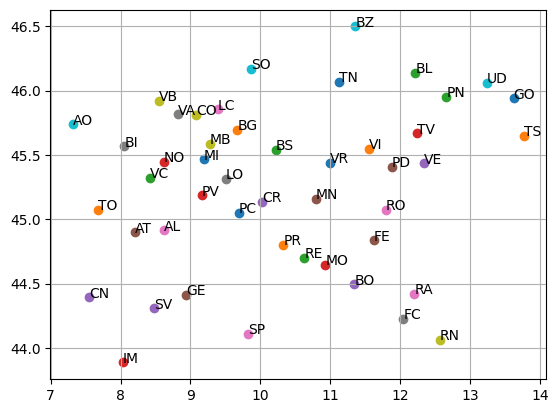

In [30]:
# loading data

provinces = pd.read_csv('..\data\dati-province\dpc-covid19-ita-province.csv')
today = '2021-06-26T17:00:00'
today_data = provinces.loc[provinces['data']==today]

population = pd.read_csv('..\data\Popolazione_province.csv', index_col=0)

p_list = pd.read_csv('..\data\Provinces_list.csv')['Sigla'].tolist()

x = today_data.loc[today_data['sigla_provincia'].isin(p_list)]['long'].values
y = today_data.loc[today_data['sigla_provincia'].isin(p_list)]['lat'].values
sigla = today_data.loc[today_data['sigla_provincia'].isin(p_list)]['sigla_provincia'].values
z = today_data.loc[today_data['sigla_provincia'].isin(p_list)]['totale_casi'].values



n_points = x.shape[0]

plt.figure()
for i in range(n_points):
    plt.scatter(x[i], y[i])
    plt.text(x[i], y[i], sigla[i])
plt.grid(True)



In [35]:
test_set = ['MO','RO', 'VI', 'AL', 'BI', 'PN', 'MB']
len(test_set)

9

In [33]:
len(p_list)*0.2

9.4

In [25]:
# Distance matrix
D = np.zeros((n_points,n_points))
for i in range(n_points):
    for j in range(i+1,n_points):
        D[i,j]=((x[j]-x[i])**2 + (y[j]-y[i])**2)**0.5
        D[j,i]=D[i,j]

df_distances = pd.DataFrame(D,columns=sigla, index = sigla)




          PC        PR        RE        MO        BO        FE        RA  \
PC  0.000000  0.683423  1.002265  1.298599  1.740797  1.938124  2.585620   
PR  0.683423  0.000000  0.319060  0.617591  1.058768  1.290812  1.909763   
RE  1.002265  0.319060  0.000000  0.300496  0.740025  0.998283  1.593869   
MO  1.298599  0.617591  0.300496  0.000000  0.442366  0.718123  1.293378   
BO  1.740797  1.058768  0.740025  0.442366  0.000000  0.439794  0.860882   
FE  1.938124  1.290812  0.998283  0.718123  0.439794  0.000000  0.715742   
RA  2.585620  1.909763  1.593869  1.293378  0.860882  0.715742  0.000000   
FC  2.490183  1.807382  1.488328  1.192214  0.749909  0.744463  0.250904   
RN  3.039121  2.356539  2.037504  1.740752  1.298401  1.223708  0.511157   
UD  3.683555  3.168440  2.940841  2.708625  2.458273  2.028891  1.944167   
GO  4.028925  3.485616  3.240406  2.991082  2.700821  2.288209  2.085257   
TS  4.119070  3.542859  3.279308  3.013925  2.687318  2.298220  1.995017   
PN  3.101604

1.938124426580939

In [ ]:
# Extracting data for each province
df_list = []
for pr in p_list:
    df_list.append(provinces.loc[provinces['sigla_provincia']==pr])

n_days = df_list[0]['totale_casi'].values.shape[0]
new_pos_dict = {}

# index = p_list.index('BO')

for index, sigla in enumerate(p_list):
    plt.figure()
    plt.title(sigla)
    my_data = df_list[index]
    pos_tot = my_data['totale_casi'].values/population['Residenti'][sigla]*100000
    new_pos = pos_tot.copy()
    new_pos[1:] = (pos_tot[1:]-pos_tot[:-1])
    new_pos_dict.update({sigla: new_pos})
    plt.plot(new_pos, label=sigla)
    plt.grid(True)

In [ ]:
# Fitting data with Forecast class

waves_dict = {}

for index, sigla in enumerate(p_list):
    print('Fitting for: '+sigla)
    new_pos_tot = new_pos_dict[sigla]

    t0=14
    T=new_pos_tot.shape[0]
    tt_forecast = np.arange(t0,T)
    rt_list = []

    my_prediction = np.zeros(T-t0)

    Forecast = fc.n_waves(new_pos_tot,window=7)
    fit_data = np.zeros(T)
    for t in tt_forecast:
        fit_data[t] = Forecast.daily_update()
        rt_list.append(Forecast.rt)
        my_prediction[t-t0] = Forecast.predict(t+1)

    waves_dict.update({sigla: Forecast.L_waves})



In [ ]:
# Save the dictionary to a file using pickle
import pickle

save_flag=False
if save_flag:
    with open('..\data\provinces_waves.pickle', 'wb') as file:
        pickle.dump(waves_dict, file)

In [28]:
coord_dict = dict(zip(sigla,zip(x,y)))

save_flag=True
if save_flag:
    with open('..\data\coordinates_dict.pickle', 'wb') as file:
        pickle.dump(coord_dict, file)

    with open('..\data\distances_df.pickle', 'wb') as file:
        pickle.dump(df_distances, file)

In [29]:
coord_dict.keys()

dict_keys(['PC', 'PR', 'RE', 'MO', 'BO', 'FE', 'RA', 'FC', 'RN', 'UD', 'GO', 'TS', 'PN', 'IM', 'SV', 'GE', 'SP', 'VA', 'CO', 'SO', 'MI', 'BG', 'BS', 'PV', 'CR', 'MN', 'LC', 'LO', 'MB', 'BZ', 'TN', 'TO', 'VC', 'NO', 'CN', 'AT', 'AL', 'BI', 'VB', 'AO', 'VR', 'VI', 'BL', 'TV', 'VE', 'PD', 'RO'])